In [ ]:
import tweepy
import seaborn as sns
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import pandas as pd
import nltk
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
nltk.download('punkt')

access_token = "1274315523325431808-zrNxVZZycmhhoSLfQ3Xmg78wV1B97H"
access_token_secret = "vnRtWtAPQ2onLSM9ePO5cbkQ0dQI61c1ZdqT9deYejUpY"
costumer_key = "6ruZzY5r7Tpnb8th1H40DZ29l"
costumer_secret = "dqJyYH8uP5W9xNXjlqGIotTpO4jB0aiuMPTrv53FGLnovDFlVw"

auth = tweepy.OAuthHandler(costumer_key,costumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)
query = 'shopee'
max_tweets = 100

public_tweets = tweepy.Cursor(api.search, q = query).items(max_tweets)
tweet_sentiment = []

for tweet in public_tweets:
  if(tweet.lang=='en') and (not tweet.retweeted) and ('RT @' not in tweet.text):
    print(tweet.text)
    analysis = TextBlob(tweet.text, analyzer = NaiveBayesAnalyzer())
    print(analysis.sentiment)
    tweet_sentiment.append(analysis.sentiment.classification)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
•&gt; 23.000 - 40.000
•&gt; link : https://t.co/2gHWJbOQMx https://t.co/noG7Ur2QQh
Sentiment(classification='pos', p_pos=0.5370370370370368, p_neg=0.46296296296296297)
we've decided to open a new donation drive for Pahang and N9 victims too. donation can be made through online banki… https://t.co/M0FyscgTXE
Sentiment(classification='pos', p_pos=0.970237518398521, p_neg=0.02976248160147777)
@sellkpopdata Dom Palembang, bisa keep event, shopee freeong https://t.co/FvhKdZdYqW
Sentiment(classification='pos', p_pos=0.8012295081967216, p_neg=0.19877049180327877)
Halo semua!🦄 @byusniess jual followers, like, views dan subs. yuk beli followers ig, folls tiktok, folls shopee, fo… https://t.co/UalwPMiSaD
Sentiment(classification='pos', p_pos=0.9878602465393463, p_neg=0.01213

In [ ]:
data = {'Tweet':tweet_sentiment}
data = pd.DataFrame(data)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


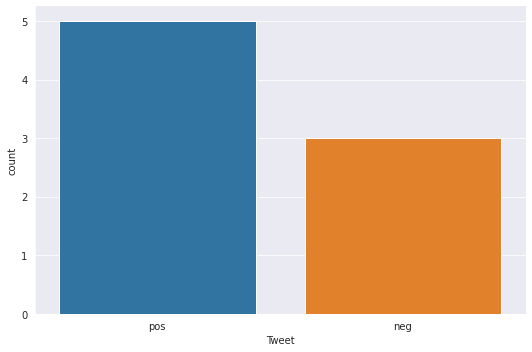

In [ ]:
sns.set_style('darkgrid')
g = sns.factorplot(x='Tweet', data=data, aspect=1.5, kind="count")